In [36]:
import pandas as pd

In [37]:
import matplotlib as plt

In [38]:
df = pd.read_csv('../data/raw/credit_card_transactions.csv')
df.head()

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     10000 non-null  int64  
 1   Time              10000 non-null  object 
 2   Amount            10000 non-null  float64
 3   CardholderName    10000 non-null  object 
 4   MerchantName      10000 non-null  object 
 5   MCC               10000 non-null  int64  
 6   Location          10000 non-null  object 
 7   Device            10000 non-null  object 
 8   IPAddress         10000 non-null  object 
 9   TransactionSpeed  10000 non-null  float64
 10  Fraud             10000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [39]:
df.describe()

,TransactionID,Amount,MCC,TransactionSpeed,Fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,547.347491,5950.102900,30.738446,0.019200
std,2886.89568,460.047329,664.526287,19.092345,0.137234
min,1.00000,10.090000,5261.000000,0.110000,0.000000
25%,2500.75000,263.222500,5411.000000,14.910000,0.000000
50%,5000.50000,512.240000,5812.000000,29.655000,0.000000
75%,7500.25000,759.935000,5968.000000,45.270000,0.000000
max,10000.00000,4988.070000,7299.000000,119.860000,1.000000


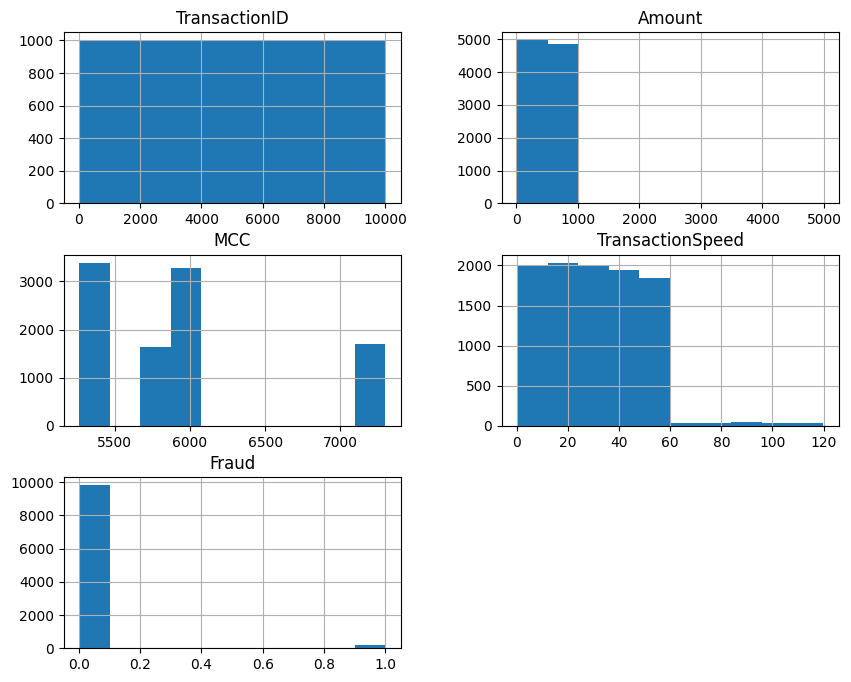

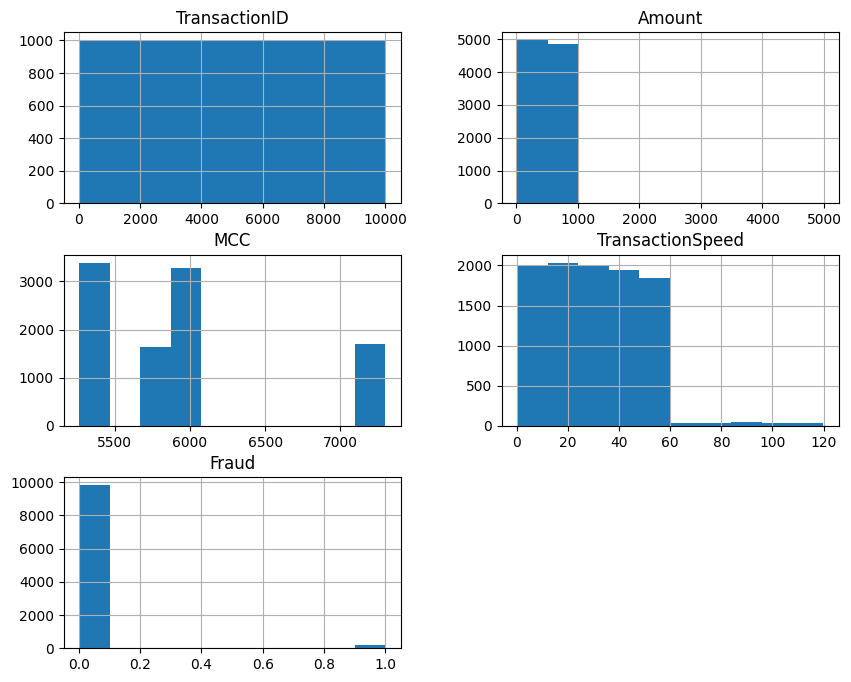

In [47]:
df.hist(figsize=(10,8))
plt.pyplot.show()

In [40]:
df.isnull().sum()

TransactionID       0
Time                0
Amount              0
CardholderName      0
MerchantName        0
MCC                 0
Location            0
Device              0
IPAddress           0
TransactionSpeed    0
Fraud               0
dtype: int64

In [41]:
df.isna().sum()

TransactionID       0
Time                0
Amount              0
CardholderName      0
MerchantName        0
MCC                 0
Location            0
Device              0
IPAddress           0
TransactionSpeed    0
Fraud               0
dtype: int64

In [42]:
df["MCC"].unique()

array([5411, 5261, 5968, 5812, 5942, 7299])

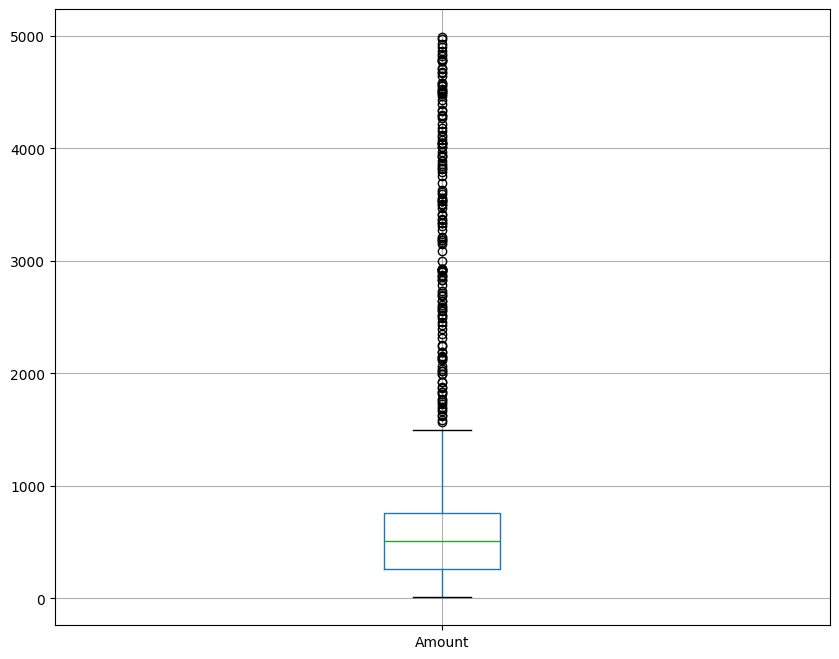

In [35]:
df[['Amount']].boxplot(figsize=(10,8))
plt.pyplot.show()


In [43]:
Q1, Q3 = df['Amount'].quantile([.25, .75])
IQR = Q3 - Q1
outliers = df[df['Amount'] > Q3 + 1.5*IQR]
print(len(outliers))

150


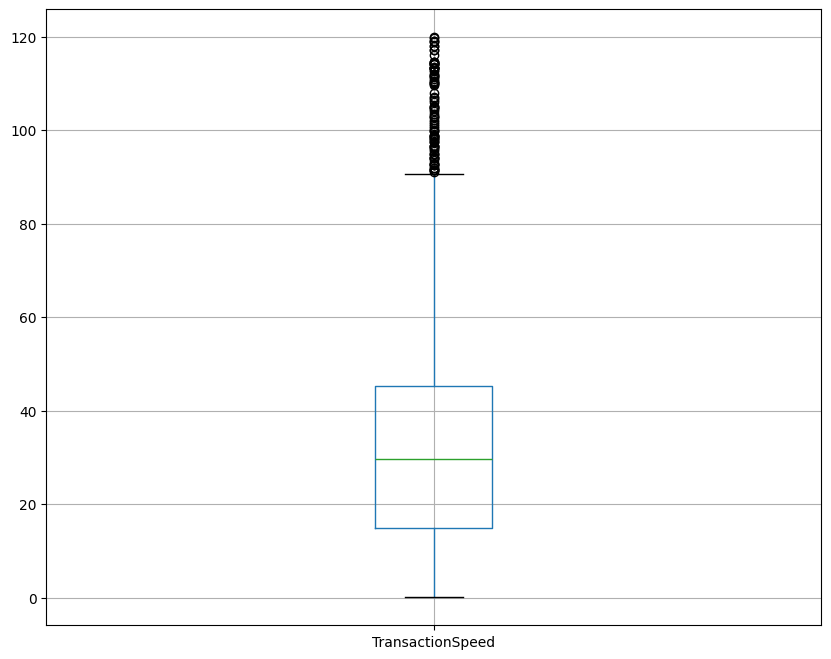

In [44]:
df[['TransactionSpeed']].boxplot(figsize=(10,8))
plt.pyplot.show()

In [45]:
Q1, Q3 = df['TransactionSpeed'].quantile([.25, .75])
IQR = Q3 - Q1
outliers = df[df['TransactionSpeed'] > Q3 + 1.5*IQR]
print(len(outliers))

99


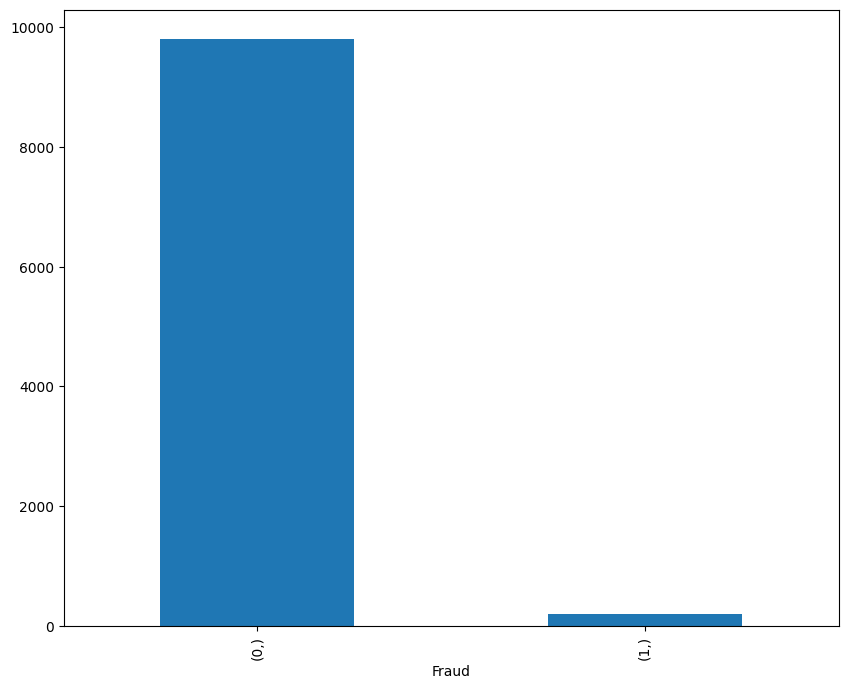

In [57]:
df[['Fraud']].value_counts().plot(kind='bar',figsize=(10,8))
plt.pyplot.show()

In [51]:
df[['Fraud']].value_counts()

Fraud
0        9808
1         192
Name: count, dtype: int64